In [1]:
import pandas as pd
import numpy as np
from scipy import stats

## Load the data from csv file to a Dataframe

In [2]:
# correcting the date format with parse_dates
df = pd.read_csv("AusApparalSales4thQrt2020.csv",parse_dates=["Date"])

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


#  1. Data wrangling

#### Check for null values 

In [6]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [9]:
# Get the count of rows of dataset in all columns 
df.count()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [8]:
# Confirming that all the columns have values in them
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [5]:
# Dataset columns row count is equal to dataset columns notna() sum
df.count() == df.notna().sum()

Date     True
Time     True
State    True
Group    True
Unit     True
Sales    True
dtype: bool

In [21]:
# Filling the null values if exists
# Assign some default values into an array using mean and mode
values = {"Date": df['Date'].mean(), "Time": df['Time'].mode()[0], "State": df['State'].mode()[0], "Group": df['Group'].mode()[0], "Unit": df['Unit'].mean(), "Sales": df['Sales'].mean()}

In [19]:
df['Sales'].mean()

45013.5582010582

#### Assign the default values to the dataframe

In [22]:
# Assign the default values to the dataframe
df.fillna(value=values,inplace=True)

/tmp/ipykernel_75/551732274.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(value=values,inplace=True)


In [5]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


#### Normalization
#### copy the data 

In [3]:
df_scaled = df.copy()

In [5]:
# Applying Normalization using min() and max()

df_scaled['Unit']=((df_scaled['Unit']-df_scaled['Unit'].min())/(df_scaled['Unit'].max()-df_scaled['Unit'].min()))*100

## df_scaled['Unit'] = (df_scaled['Unit'] - df_scaled['Unit'].min()) / (df_scaled['Unit'].max() - df_scaled['Unit'].min())*100
## df_scaled['Sales'] = (df_scaled['Sales'] - df_scaled['Sales'].min()) / (df_scaled['Sales'].max() - df_scaled['Sales'].min())
## df_scaled['Unit'] = df_scaled['Unit'].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
## df_scaled['Sales'] = df_scaled['Sales'].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 

In [6]:
#df_scaled.head()
df_scaled['Sales']=(df_scaled['Sales']-df_scaled['Sales'].min())/(df_scaled['Sales'].max()-df_scaled['Sales'].min())


In [7]:
df_scaled.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,9.523810,0.095238
1,2020-10-01,Morning,WA,Men,9.523810,0.095238
2,2020-10-01,Morning,WA,Women,3.174603,0.031746
3,2020-10-01,Morning,WA,Seniors,20.634921,0.206349
4,2020-10-01,Afternoon,WA,Kids,1.587302,0.015873


#### Groupby function

In [14]:
## Group by Date on Sales
df.groupby('Date')['Sales'].count()
df.groupby('Date')['Sales'].sum()

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Name: Sales, Length: 90, dtype: int64

In [16]:
## Group by Date on Unit
df.groupby('Date')['Unit'].sum()
df.groupby('Date')['Unit'].count()

Date
2020-10-01    84
2020-10-02    84
2020-10-03    84
2020-10-04    84
2020-10-05    84
              ..
2020-12-26    84
2020-12-27    84
2020-12-28    84
2020-12-29    84
2020-12-30    84
Name: Unit, Length: 90, dtype: int64

In [17]:
## Group by Time on Sales
df.groupby('Time')['Sales'].sum()

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

In [18]:
## Group by Time on Unit
df.groupby('Time')['Unit'].sum()

Time
 Afternoon    45603
 Evening      44835
 Morning      45683
Name: Unit, dtype: int64

In [20]:
## Group by State and Group on Sales
df.groupby(['State','Group'])['Sales'].sum()

State  Group   
 NSW    Kids       18587500
        Men        19022500
        Seniors    18187500
        Women      19172500
 NT     Kids        5700000
        Men         5762500
        Seniors     5465000
        Women       5652500
 QLD    Kids        8510000
        Men         8392500
        Seniors     8190000
        Women       8325000
 SA     Kids       14515000
        Men        14655000
        Seniors    14717500
        Women      14970000
 TAS    Kids        5775000
        Men         5757500
        Seniors     5650000
        Women       5577500
 VIC    Kids       26360000
        Men        26407500
        Seniors    26315000
        Women      26482500
 WA     Kids        5625000
        Men         5752500
        Seniors     5512500
        Women       5262500
Name: Sales, dtype: int64

In [21]:
## Group by State and Group on Unit
df.groupby(['State','Group'])['Unit'].sum()

State  Group   
 NSW    Kids        7435
        Men         7609
        Seniors     7275
        Women       7669
 NT     Kids        2280
        Men         2305
        Seniors     2186
        Women       2261
 QLD    Kids        3404
        Men         3357
        Seniors     3276
        Women       3330
 SA     Kids        5806
        Men         5862
        Seniors     5887
        Women       5988
 TAS    Kids        2310
        Men         2303
        Seniors     2260
        Women       2231
 VIC    Kids       10544
        Men        10563
        Seniors    10526
        Women      10593
 WA     Kids        2250
        Men         2301
        Seniors     2205
        Women       2105
Name: Unit, dtype: int64

In [22]:
## Group by Date and Time on Sales
df.groupby(['Date','Time'])['Sales'].sum()

Date        Time      
2020-10-01   Afternoon    1212500
             Evening      1282500
             Morning      1225000
2020-10-02   Afternoon    1275000
             Evening      1162500
                           ...   
2020-12-29   Evening      1487500
             Morning      1620000
2020-12-30   Afternoon    1507500
             Evening      1475000
             Morning      1607500
Name: Sales, Length: 270, dtype: int64

In [26]:
## Group by Date and Time on Unit
df.groupby(['Date','Time'])['Unit'].sum()
df.groupby(['Date','Time'])['Unit'].max()  #max value

Date        Time      
2020-10-01   Afternoon    40
             Evening      50
             Morning      49
2020-10-02   Afternoon    46
             Evening      42
                          ..
2020-12-29   Evening      54
             Morning      57
2020-12-30   Afternoon    62
             Evening      41
             Morning      65
Name: Unit, Length: 270, dtype: int64

In [27]:
## Group by State and Group on Sales and Unit
df.groupby(['State','Group'])['Sales','Unit'].sum()

/tmp/ipykernel_79/332183968.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['State','Group'])['Sales','Unit'].sum()


Sales   Unit
State Group                    
 NSW   Kids     18587500   7435
       Men      19022500   7609
       Seniors  18187500   7275
       Women    19172500   7669
 NT    Kids      5700000   2280
       Men       5762500   2305
       Seniors   5465000   2186
       Women     5652500   2261
 QLD   Kids      8510000   3404
       Men       8392500   3357
       Seniors   8190000   3276
       Women     8325000   3330
 SA    Kids     14515000   5806
       Men      14655000   5862
       Seniors  14717500   5887
       Women    14970000   5988
 TAS   Kids      5775000   2310
       Men       5757500   2303
       Seniors   5650000   2260
       Women     5577500   2231
 VIC   Kids     26360000  10544
       Men      26407500  10563
       Seniors  26315000  10526
       Women    26482500  10593
 WA    Kids      5625000   2250
       Men       5752500   2301
       Seniors   5512500   2205
       Women     5262500   2105

# 2. Data analysis

## Descriptive Statistical Analysis

In [4]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [5]:
df.describe().at['mean','Unit']

18.00542328042328

In [6]:
df.describe().at['mean','Sales']

45013.5582010582

In [7]:
df.describe().at['std','Unit']

12.90140277758643

In [8]:
df.describe().at['std','Sales']

32253.506943966073

In [14]:
## Unit mean
df_Unit_mean = np.mean(df['Unit'])

In [15]:
df_Unit_mean

18.00542328042328

In [16]:
## Sales mean
df_Sales_mean = np.mean(df['Sales'])

In [17]:
df_Sales_mean

45013.5582010582

In [18]:
## Sales Median
df_Sales_median = np.median(df['Sales'])

In [19]:
df_Sales_median

35000.0

In [20]:
## Sales Median
df_Unit_median = np.median(df['Unit'])

In [21]:
df_Unit_median

14.0

In [26]:
## Sales Mode
df_Sales_mode = stats.mode(df['Sales'],keepdims=True)

In [27]:
df_Sales_mode

ModeResult(mode=array([22500]), count=array([406]))

In [28]:
## Unit Mode
df_Unit_mode = stats.mode(df['Unit'],keepdims=True)

In [29]:
df_Unit_mode

ModeResult(mode=array([9]), count=array([406]))

In [33]:
import statistics
df_Sales_std = statistics.stdev(df['Sales'])

In [34]:
df_Sales_std

32253.506943966073

In [3]:
## Group with highest sales and Unit
df.groupby('Group')['Sales','Unit'].sum()

/tmp/ipykernel_98/2459889058.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Group')['Sales','Unit'].sum()


,Sales,Unit
Group,,
Kids,85072500,34029
Men,85750000,34300
Seniors,84037500,33615
Women,85442500,34177


In [43]:
df.groupby('Group')['Sales','Unit'].sum().max()

/tmp/ipykernel_361/226328290.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Group')['Sales','Unit'].sum().max()


Sales    85750000
Unit        34300
dtype: int64

In [44]:
## Group with lowest sales and Unit
df.groupby('Group')['Sales','Unit'].sum().min()

/tmp/ipykernel_361/4226832111.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Group')['Sales','Unit'].sum().min()


Sales    84037500
Unit        33615
dtype: int64

#### Weekly, Monthly, and Quarterly Reports

In [100]:
df.set_index('Date',inplace= True)

In [5]:
## Weekly Sales
weekly_Sales= df['Sales'].resample('w').sum()

In [6]:
weekly_Sales

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [108]:
## Monthly Sales
monthly_Sales= df['Sales'].resample('m').sum()

In [109]:
monthly_Sales

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

In [111]:
## Quarterly Sales
Quarterly_Sales= df['Sales'].resample('q').sum()

In [112]:
Quarterly_Sales

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

# 3. Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='State,Group'>

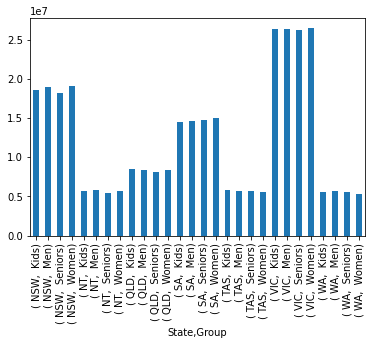

In [13]:
## Group by State and Group on Sales
bg = df.groupby(['State','Group'])['Sales'].sum()
bg.plot.bar()

In [17]:
bg = df.groupby(['State'])['Sales'].sum()
bg

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

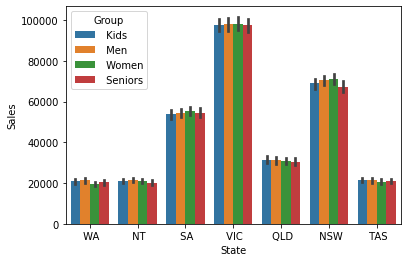

In [21]:
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.show()

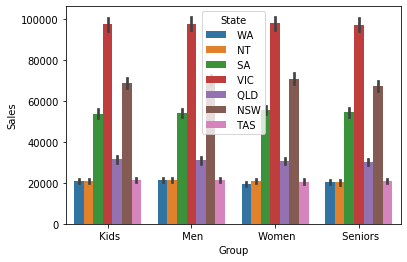

In [20]:
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.show()

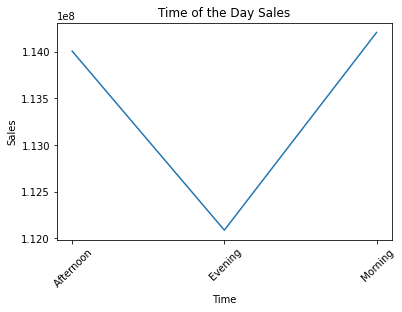

In [26]:
## Group by State and Group on Sales
lg = df.groupby(['Time'])['Sales'].sum()
## lg.plot.line()
plt.plot(lg)
plt.title('Time of the Day Sales')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

## Daily, Weekly, Monthly and Quarterly Charts

In [104]:
## Daily Sales

Daily_Sales= df['Sales'].resample('d').sum()

In [105]:
Daily_Sales

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Freq: D, Name: Sales, Length: 91, dtype: int64

In [82]:
df.reset_index(inplace=True)

In [31]:
df_Test = df.copy()
df_Test.set_index('Date',inplace= True)

#### Daily Sales visualization

In [58]:
df_Daily = (df_Test.groupby(["Group",pd.Grouper(freq='d')])['Sales'].sum()
             .reset_index()
             .assign(Day = lambda x: x["Date"].dt.day))
df_Daily

,Group,Date,Sales,Day
0,Kids,2020-10-01,972500,1
1,Kids,2020-10-02,922500,2
2,Kids,2020-10-03,950000,3
3,Kids,2020-10-04,845000,4
4,Kids,2020-10-05,1070000,5
...,...,...,...,...
355,Women,2020-12-26,1190000,26
356,Women,2020-12-27,1227500,27
357,Women,2020-12-28,1220000,28
358,Women,2020-12-29,1080000,29


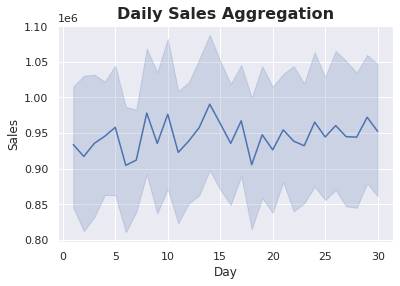

In [61]:
sns.lineplot(x='Day', y='Sales',  data= df_Daily)
plt.title("Daily Sales Aggregation", weight="bold", size=16)
plt.show()

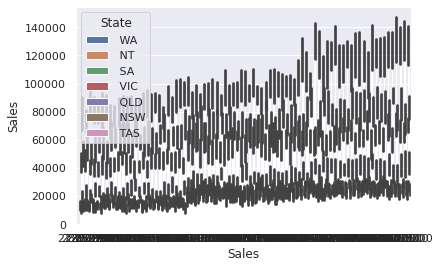

In [96]:
sns.barplot(x=Daily_Sales, y='Sales', hue='State', data=df_Test)
plt.show()

#### Weekly Sales visualization

In [52]:
df_weekly = (df_Test.groupby(["Group",pd.Grouper(freq='w')])['Sales'].sum()
             .reset_index()
             .assign(Week = lambda x: x["Date"].dt.week))
df_weekly

/tmp/ipykernel_80/442273570.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  .assign(Week = lambda x: x["Date"].dt.week))


,Group,Date,Sales,Week
0,Kids,2020-10-04,3690000,40
1,Kids,2020-10-11,7020000,41
2,Kids,2020-10-18,6707500,42
3,Kids,2020-10-25,6525000,43
4,Kids,2020-11-01,5490000,44
5,Kids,2020-11-08,5125000,45
6,Kids,2020-11-15,5315000,46
7,Kids,2020-11-22,5302500,47
8,Kids,2020-11-29,5577500,48
9,Kids,2020-12-06,7362500,49


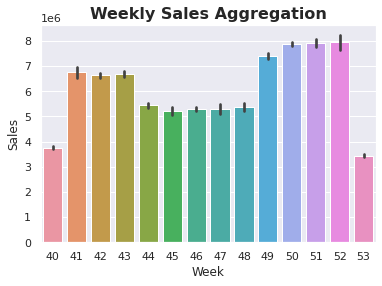

In [60]:
sns.barplot(x='Week', y='Sales',  data= df_weekly)
plt.title("Weekly Sales Aggregation", weight="bold", size=16)
plt.show()

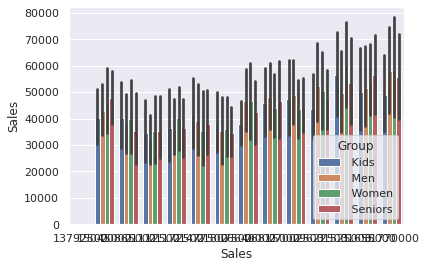

In [92]:
sns.barplot(x=weekly_Sales, y='Sales',hue='Group',  data=df_Test)
plt.show()

<AxesSubplot: xlabel='Date'>

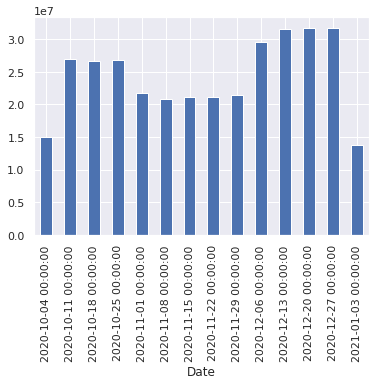

In [98]:
weekly_Sales.plot.bar()

#### Monthly Sales visualization

In [42]:
df_monthly = (df_Test.groupby(["Group",pd.Grouper(freq='m')])['Sales'].sum()
             .reset_index()
             .assign(Month = lambda x: x["Date"].dt.month))
df_monthly

,Group,Date,Sales,Month
0,Kids,2020-10-31,28635000,10
1,Kids,2020-11-30,22882500,11
2,Kids,2020-12-31,33555000,12
3,Men,2020-10-31,28885000,10
4,Men,2020-11-30,22615000,11
5,Men,2020-12-31,34250000,12
6,Seniors,2020-10-31,28565000,10
7,Seniors,2020-11-30,22322500,11
8,Seniors,2020-12-31,33150000,12
9,Women,2020-10-31,28205000,10


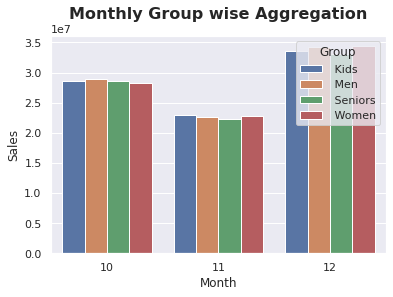

In [50]:

sns.barplot(x='Month', y='Sales', hue='Group', data= df_monthly)
plt.title("Monthly Group wise Aggregation", weight="bold", size=16)
plt.show()

<AxesSubplot: xlabel='Date'>

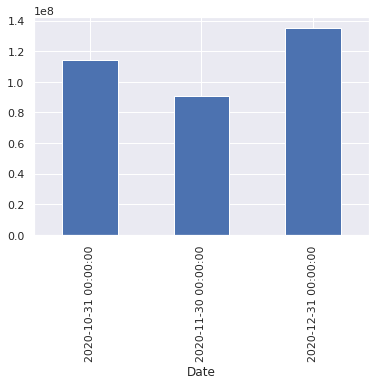

In [110]:
monthly_Sales.plot.bar()

#### Quarterly Sales visualization

In [48]:
df_Quarterly = (df_Test.groupby(["Group",pd.Grouper(freq='q')])['Sales'].sum()
             .reset_index()
             .assign(Quarter = lambda x: x["Date"].dt.quarter))
df_Quarterly

,Group,Date,Sales,Quarter
0,Kids,2020-12-31,85072500,4
1,Men,2020-12-31,85750000,4
2,Seniors,2020-12-31,84037500,4
3,Women,2020-12-31,85442500,4


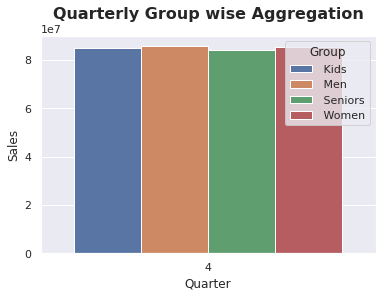

In [51]:
sns.barplot(x='Quarter', y='Sales', hue='Group', data= df_Quarterly)
plt.title("Quarterly Group wise Aggregation", weight="bold", size=16)
plt.show()

<AxesSubplot: xlabel='Date'>

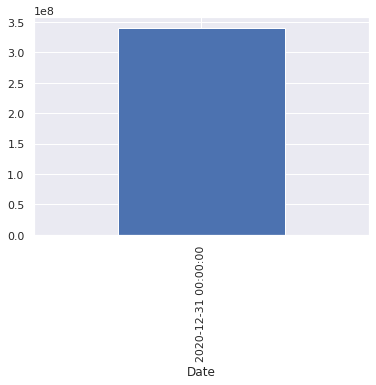

In [113]:
Quarterly_Sales.plot.bar()